<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance
!pip install -q hurst
!pip install -q nolds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst
from nolds import corr_dim, hurst_rs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

Generowanie danych


In [ ]:
# N = 500
# scalar = 10
# t = pd.date_range('2015-07-01', periods=N, freq=BDay())
# x = np.log(np.cumsum(np.random.randn(N) + 1)) + scalar
# x = np.sin(np.random.normal(loc=1, scale=0.03, size=N))

# x = pd.Series(x, index=t)

# plt.figure(figsize=(10,3))
# plt.plot(t,x, label='orginal')
# plt.legend()
# plt.show()

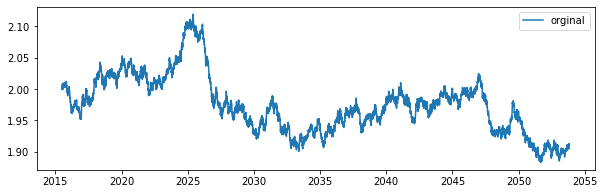

0.5040827495600316


In [ ]:
N = 9999
scalar = 10
# x = pd.Series(x, index=t)

# x = hurst.random_walk(N, proba=0.5)
t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
raw_x = np.cumprod(random_changes)*2  # create a random walk from random changes
x = pd.Series(raw_x, index=t)

pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

print(pp[0])

# Zad 1
Wersja biblioteczna

In [ ]:
x.describe()

count    9999.000000
mean        1.974741
std         0.045655
min         1.883426
25%         1.940908
50%         1.972467
75%         2.000811
max         2.119048
dtype: float64

In [ ]:
print(kurtosis(x))

0.2785427643322378


# Zad 2

In [ ]:
# E = x.apply(lambda x : entropy(N, base=2)).reset_index()

E = entropy(x)
print(E)

13.287184169893939


In [ ]:
# def hurst(input_ts, lags_to_test=[2, 100]):
#   tau = []
#   lagvec = []

#   # print(None is input_ts)
#   for lag in range(lags_to_test[0], lags_to_test[1]):
#     # pp = np.subtract(input_ts[lag:], input_ts[:-lag])
#     pp = input_ts[lag:] - input_ts[:-lag]
#     # print(pp)
#     # print(input_ts[:-lag])
#     # print(None is pp)
#     lagvec.append(lag)
#     tau.append(np.std(pp))

#   # print(lagvec)
#   # print(tau)

#   m = np.polyfit(lagvec, tau, 1)
#   return m[0]

# print(hurst(series))

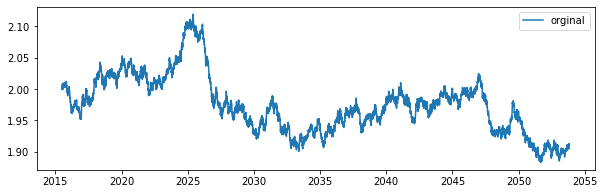

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [ ]:
print(hurst.compute_Hc(x)[0])

0.4971702060277432


In [ ]:
print(corr_dim(x, 1))

0.96749294834015


In [ ]:
# def vectorized_stride_v1(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         np.expand_dims(np.arange(max_time + 1), 0).T
#     )
    
#     # Fancy indexing to select every V rows.
#     return array[sub_windows[::stride_size]]


# def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         # Create a rightmost vector as [0, V, 2V, ...].
#         np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
#     )
    
#     return array[sub_windows]

In [ ]:
# vectorized_stride_v2(x, )

In [ ]:
# def rolling_window(seq, window_size):
#     it = iter(seq)
#     win = [it.next() for cnt in range(window_size)] # First window
#     yield win
#     for e in it: # Subsequent windows
#         win[:-1] = win[1:]
#         win[-1] = e
#         yield win

# Zad 3


Dla zadania 1


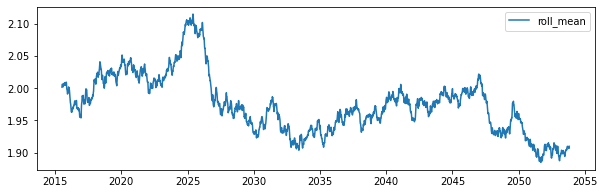

In [ ]:
roll_mean = x.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

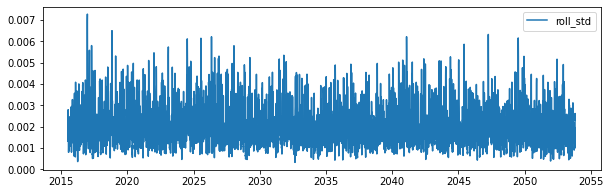

In [ ]:
roll_std = x.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

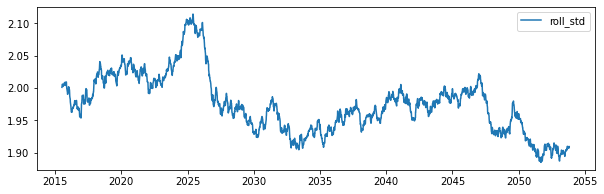

In [ ]:
roll_median = x.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

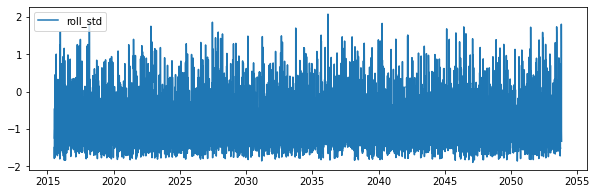

In [ ]:
roll_kurtosis = x.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

Do zadania 2

In [ ]:
def entopy_base_2(data):
    return entropy(data)

In [ ]:
def first_hurst(data):
    return hurst.compute_Hc(data)[0]

In [ ]:
def fractal_dim(data):
    return corr_dim(data, 1)

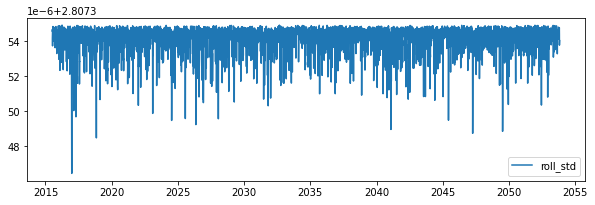

In [ ]:
roll_entropy = x.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

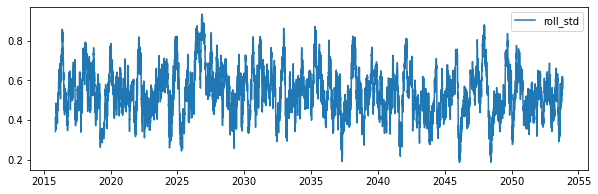

In [ ]:
roll_hurst = x.rolling(100).apply(first_hurst)

plt.figure(figsize=(10,3))
plt.plot(t, roll_hurst, label='roll_std')
plt.legend()
plt.show()

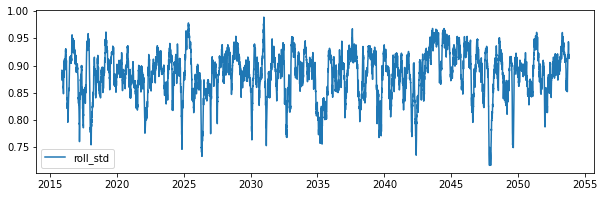

In [ ]:
roll_fractal = x.rolling(100).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()

# Zad 4

Normalized


In [ ]:
raw_x = raw_x.reshape(-1, 1)
normalized = normalize(raw_x, norm='l2')
print(normalized)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


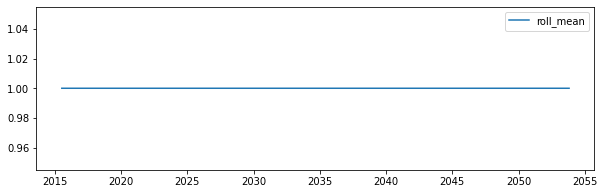

In [ ]:
# roll_entropy = x.rolling(7).apply(entopy_base_2)

# plt.figure(figsize=(10,3))
# plt.plot(t, roll_entropy, label='roll_std')
# plt.legend()
# plt.show()
normalized = pd.DataFrame(normalized)

roll_mean = normalized.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

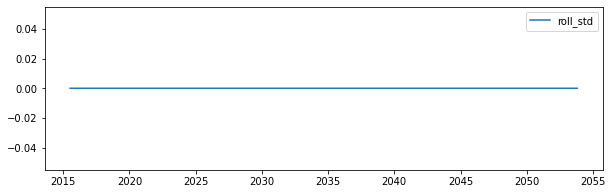

In [ ]:
roll_std = normalized.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

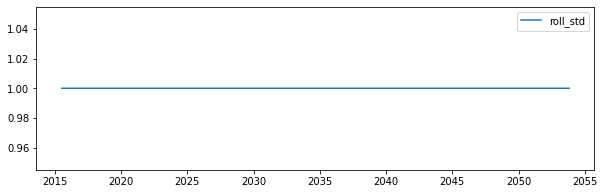

In [ ]:
roll_median = normalized.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/window/rolling.py:1342: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return window_func(values, begin, end, min_periods)


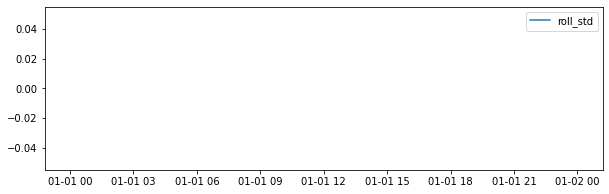

In [ ]:
roll_kurtosis = normalized.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

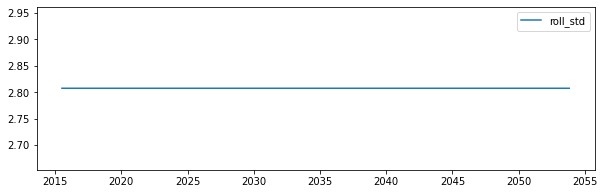

In [ ]:
roll_entropy = normalized.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

In [ ]:
# roll_fractal = normalized.rolling(100).apply(fractal_dim)

# plt.figure(figsize=(10,3))
# plt.plot(t, roll_fractal, label='roll_std')
# plt.legend()
# plt.show()

# print(max(normalized))
# print(min(normalized))


0
0


Scaled


In [ ]:
scaler = StandardScaler()
# scaled = scaler.fit(x)
raw_x = raw_x.reshape(-1, 1)
stand = scaler.fit_transform(raw_x)

# plt.figure(figsize=(10,3))
# plt.plot(t, stand, label='roll_std')
# # plt.plot(t, raw_x, label='roll_std')
# plt.legend()
# plt.show()

stand = pd.DataFrame(stand)

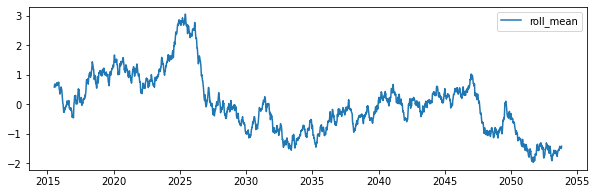

In [ ]:
roll_mean = stand.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

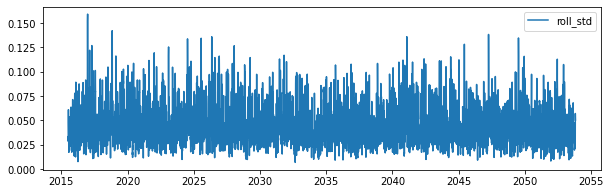

In [ ]:
roll_std = stand.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

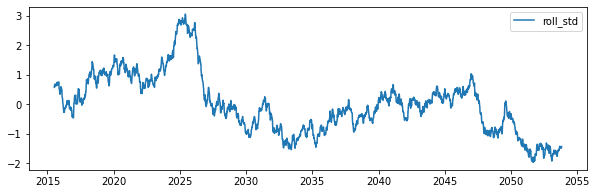

In [ ]:
roll_median = stand.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

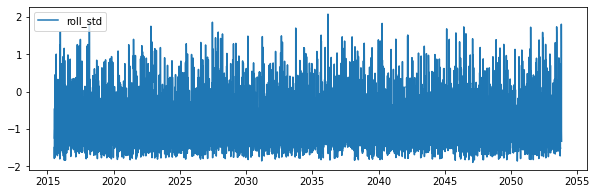

In [ ]:
roll_kurtosis = stand.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

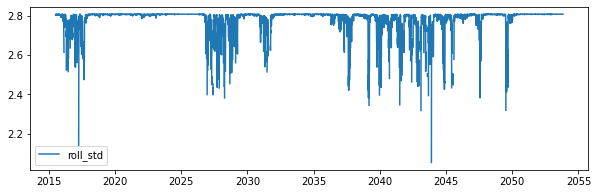

In [ ]:
roll_entropy = stand.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

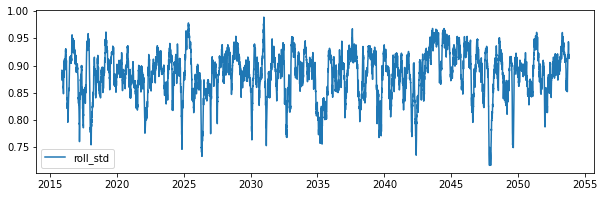

In [ ]:
roll_fractal = stand.rolling(100).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()